<a href="https://colab.research.google.com/github/DarkMortal/Machine-Learning/blob/main/Feature%20Selection/Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a supervised dimension reduction technique and a classification algorithm. Its primary goal is to find a linear combination of features that separates two or more classes of objects or events. Unlike Principal Component Analysis (PCA), which focuses on maximizing the variance in the data, LDA explicitly attempts to model the difference between the classes of data.

## Key Concepts:

1.  **Supervised Learning**: LDA requires labeled data (class information) to find the optimal projection.
2.  **Dimensionality Reduction**: It projects the data onto a lower-dimensional space while retaining the class-discriminatory information.
3.  **Classification**: LDA can also be used as a classifier, as it finds a decision boundary that best separates the classes.

## When to use LDA?

*   When you need to reduce the dimensionality of your data, but also want to ensure that the reduced dimensions are maximally discriminative of the classes.
*   As a pre-processing step for classification algorithms to improve their performance and reduce computational cost.
*   When dealing with multi-class classification problems, as it naturally extends to more than two classes.

## Mathematical Foundation of LDA

LDA aims to find a projection that maximizes the separation between classes while minimizing the variance within each class. This is achieved by maximizing the ratio of between-class variance to within-class variance.

Let's define some key terms:

*   **Between-class scatter matrix ($S_B$)**: Measures the separation between the means of different classes.
*   **Within-class scatter matrix ($S_W$)**: Measures the scatter (variance) of samples within the same class.

### 1. Class Means and Overall Mean

For $K$ classes, let $N_i$ be the number of samples in class $i$, and $x_j^{(i)}$ be the $j$-th sample in class $i$. The mean vector for class $i$ is:

$$\mu_i = \frac{1}{N_i} \sum_{j=1}^{N_i} x_j^{(i)}$$
This represents the collection of the means of all the features across the data-points of class $i$.<br/>
The overall mean vector of the data is:

$$\mu = \frac{1}{N} \sum_{i=1}^{K} \sum_{j=1}^{N_i} x_j^{(i)}$$
This represents the collection of the means of all the features across the data-points of all the classes.
### 2. Within-Class Scatter Matrix ($S_W$)

The within-class scatter matrix is the sum of the scatter matrices of each class. The scatter matrix for class $i$ is defined as:

$$S_i = \sum_{j=1}^{N_i} (x_j^{(i)} - \mu_i)_{N_i\times1}(x_j^{(i)} - \mu_i)_{1\times N_i}^T$$

And the total within-class scatter matrix is:

$$S_W = \sum_{i=1}^{K} S_i = \sum_{i=1}^{K} \sum_{j=1}^{N_i} (x_j^{(i)} - \mu_i)_{N_i\times1}(x_j^{(i)} - \mu_i)_{1\times N_i}^T$$

### 3. Between-Class Scatter Matrix ($S_B$)

The between-class scatter matrix measures the separation of class means:

$$S_B = \sum_{i=1}^{K} N_i (\mu_i - \mu)(\mu_i - \mu)^T$$

### 4. Objective Function

LDA seeks to find a projection matrix $W$ (whose columns are the discriminant vectors) that maximizes the ratio:

$$J(W) = \frac{|W^T S_B W|}{|W^T S_W W|}$$

This is equivalent to solving the generalized eigenvalue problem:

$$S_B w = \lambda S_W w$$

where $w$ are the eigenvectors (linear discriminants) and $\lambda$ are the eigenvalues. We select the eigenvectors corresponding to the largest eigenvalues, as they represent the directions that maximize the class separability. The maximum number of discriminant vectors (dimensions) that can be obtained is $K-1$ (where $K$ is the number of classes) or $p$ (the original number of features), whichever is smaller.

## LDA Implementation Example with `sklearn`

Let's apply LDA to a synthetic dataset to illustrate its usage. We'll generate a dataset with three classes and then use `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` to reduce its dimensionality and visualize the separation.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=300,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=42
)

# Convert to DataFrame for easier handling and visualization
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['target'] = y

print("Original dataset shape:", df.shape)
print("Number of samples per class:\n", df['target'].value_counts())
display(df.head())


Original dataset shape: (300, 6)
Number of samples per class:
 target
1    100
0    100
2    100
Name: count, dtype: int64


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.889746,-1.070594,3.624180,2.307879,-2.903343,1
1,-0.291490,0.323800,0.622994,0.874699,-0.374013,0
2,0.361677,-0.527469,-0.166264,0.439415,-0.397430,1
3,0.520664,-0.838387,-3.524792,2.225465,-1.788973,0
4,-0.089523,1.214509,-0.168711,1.215131,-0.748768,0


### Data Preprocessing: Scaling

LDA is sensitive to the scale of the features because it relies on distance calculations. Therefore, it's a good practice to standardize the features before applying LDA.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)


Scaled training data shape: (210, 5)
Scaled testing data shape: (90, 5)


### Applying LDA

Now, we'll apply LDA to the scaled training data. Since we have 3 classes, LDA can project the data onto a maximum of $K-1 = 3-1 = 2$ dimensions.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2) # Max components for 3 classes is 2
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("Transformed training data shape:", X_train_lda.shape)
print("Transformed testing data shape:", X_test_lda.shape)

# Explained variance ratio
print("\nExplained variance ratio:", lda.explained_variance_ratio_)
print("Sum of explained variance ratio:", sum(lda.explained_variance_ratio_))


Transformed training data shape: (210, 2)
Transformed testing data shape: (90, 2)

Explained variance ratio: [0.85589716 0.14410284]
Sum of explained variance ratio: 1.0


The `explained_variance_ratio_` attribute tells us how much of the class-discriminatory information is captured by each discriminant. In this case, both components together capture all the discriminatory information, which is expected as we projected to the maximum possible dimensions (K-1).

### Visualization of LDA Results

Let's visualize the projected data in the 2D LDA space to see how well the classes are separated.

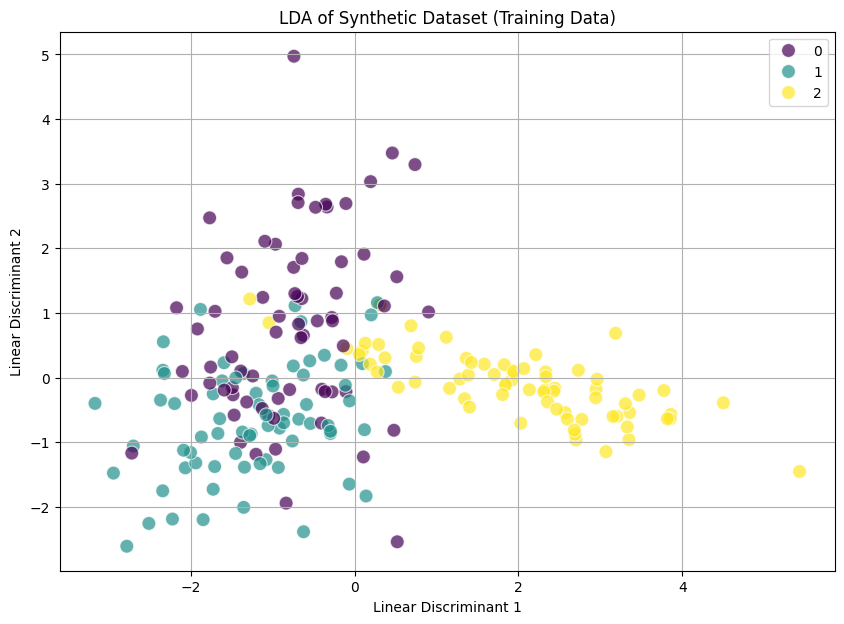

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_train_lda[:, 0], y=X_train_lda[:, 1],
    hue=y_train, palette='viridis', s=100, alpha=0.7
)
plt.title('LDA of Synthetic Dataset (Training Data)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.grid(True)
plt.show()


As we can see from the plot, LDA has successfully projected the 5-dimensional data onto a 2-dimensional space where the three classes are clearly separated. This demonstrates the power of LDA in finding directions that maximize class discrimination.
***